In [1]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_10000.json'

In [3]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

10000

In [4]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Sun Jul 31 16:08:51 +0000 2022',
 'id': 1553774700660232192,
 'id_str': '1553774700660232192',
 'full_text': "Ask Netflix, and another streaming service to pick up The Time Traveler's Wife - Sign the Petition! https://t.co/09mcPR7pqH via @UKChange",
 'truncated': False,
 'display_text_range': [0, 137],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'UKChange',
    'name': 'Change.org UK',
    'id': 397998902,
    'id_str': '397998902',
    'indices': [128, 137]}],
  'urls': [{'url': 'https://t.co/09mcPR7pqH',
    'expanded_url': 'https://chng.it/hcqWdQ4J',
    'display_url': 'chng.it/hcqWdQ4J',
    'indices': [100, 123]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_scre

In [5]:
data[0]['full_text']

"Ask Netflix, and another streaming service to pick up The Time Traveler's Wife - Sign the Petition! https://t.co/09mcPR7pqH via @UKChange"

In [6]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,"Ask Netflix, and another streaming service to ..."
1,@ripx4nutmeg @archer_rs Does Jordan Linden und...
2,we got married : tenyang\nhttps://t.co/EYtSmbKeU9
3,@odd_eroaka If she was married it would be per...
4,I had a teacher who threw textbooks at us when...
...,...
9995,@Lynda_Katerra Crazy isn’t it. My wife’s iPhon...
9996,Okay shakti is scary … he may actually hurt h...
9997,"@LudmillaGeiszne @BethSpieker8 Great pics, gre..."
9998,Every time one of you achieves a milestone in ...


In [7]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,"Ask Netflix, and another streaming service to ...",0,0,ByElleJayce
1,@ripx4nutmeg @archer_rs Does Jordan Linden und...,0,0,HelenNicholas4
2,we got married : tenyang\nhttps://t.co/EYtSmbKeU9,0,0,aforliu
3,@odd_eroaka If she was married it would be per...,0,0,Voltarmeunt
4,I had a teacher who threw textbooks at us when...,0,0,trollprincess
...,...,...,...,...
9995,@Lynda_Katerra Crazy isn’t it. My wife’s iPhon...,0,1,ufotruthdigger
9996,Okay shakti is scary … he may actually hurt h...,1,1,tejasswi_duniya
9997,"@LudmillaGeiszne @BethSpieker8 Great pics, gre...",0,1,lovetoeatalways
9998,Every time one of you achieves a milestone in ...,0,4,doepikapadukone


In [8]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))
stop_words.update(('one','u','one','really','getting','people','woman','gay','im','guy','even','like','ta'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [9]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,"Ask Netflix, and another streaming service to ...",0,0,ByElleJayce,ask netflix another streaming service pick tim...
1,@ripx4nutmeg @archer_rs Does Jordan Linden und...,0,0,HelenNicholas4,ripx4nutmeg jordan linden understand women ref...
2,we got married : tenyang\nhttps://t.co/EYtSmbKeU9,0,0,aforliu,got married tenyang
3,@odd_eroaka If she was married it would be per...,0,0,Voltarmeunt,married would perfect
4,I had a teacher who threw textbooks at us when...,0,0,trollprincess,teacher threw textbooks us got mad threw desk ...
...,...,...,...,...,...
9995,@Lynda_Katerra Crazy isn’t it. My wife’s iPhon...,0,1,ufotruthdigger,crazy isnt wifes iphone 1tb storage pictures
9996,Okay shakti is scary … he may actually hurt h...,1,1,tejasswi_duniya,okay shakti scary may actually hurt deepika go...
9997,"@LudmillaGeiszne @BethSpieker8 Great pics, gre...",0,1,lovetoeatalways,ludmillageiszne bethspieker8 great pics great ...
9998,Every time one of you achieves a milestone in ...,0,4,doepikapadukone,every time achieves milestone life get emotion...


In [10]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,"Ask Netflix, and another streaming service to ...",0,0,ByElleJayce,ask netflix another streaming service pick tim...,0.000000,0.000000
1,@ripx4nutmeg @archer_rs Does Jordan Linden und...,0,0,HelenNicholas4,ripx4nutmeg jordan linden understand women ref...,-0.020833,0.401389
2,we got married : tenyang\nhttps://t.co/EYtSmbKeU9,0,0,aforliu,got married tenyang,0.250000,0.250000
3,@odd_eroaka If she was married it would be per...,0,0,Voltarmeunt,married would perfect,0.625000,0.625000
4,I had a teacher who threw textbooks at us when...,0,0,trollprincess,teacher threw textbooks us got mad threw desk ...,0.132143,0.734921
...,...,...,...,...,...,...,...
9995,@Lynda_Katerra Crazy isn’t it. My wife’s iPhon...,0,1,ufotruthdigger,crazy isnt wifes iphone 1tb storage pictures,-0.600000,0.900000
9996,Okay shakti is scary … he may actually hurt h...,1,1,tejasswi_duniya,okay shakti scary may actually hurt deepika go...,0.062500,0.462500
9997,"@LudmillaGeiszne @BethSpieker8 Great pics, gre...",0,1,lovetoeatalways,ludmillageiszne bethspieker8 great pics great ...,0.533333,0.633333
9998,Every time one of you achieves a milestone in ...,0,4,doepikapadukone,every time achieves milestone life get emotion...,0.247222,0.738889


In [11]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=False).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
2950,@SAVoltolin Paul encouraged her to go. 😂 Husba...,0,0,tinalyngrace,savoltolin paul encouraged go husband knows best,1.0,0.3
4047,"I have the best goat husband in the world "" 🥹♥...",0,6,Amothersloving,best goat husband world,1.0,0.3
617,The best season to get married~~~~~~~💗💗💗💗 http...,0,1,candace_chan,best season get,1.0,0.3
998,'Husband Material' by Alexis Hall hits shelves...,0,0,RaincoastBooks,material alexis hall hits shelves tuesday feat...,1.0,0.3
2636,Went to Mama Earth store in a mall as wife had...,0,0,dheerajsharmads,went mama earth store mall wife buy stuff brow...,1.0,0.3
7736,@smiIecube im the best husband ever,0,0,trickylich,smiiecube best husband ever,1.0,0.3
8794,Sunday mornings with the wife and kids are the...,0,1,mattderron,sunday mornings wife kids best,1.0,0.3
6832,If your husband isn’t your best friend then wh...,0,1,hordingcatswife,husband isnt best friend,1.0,0.3
6958,The best way to remember your wife's birthday ...,0,0,yuqualasosot,best way remember wife birthday forget,1.0,0.3
1474,@Craig_Pankhurst @davidmcgeoch9 At the start o...,0,1,LGetzler,davidmcgeoch9 start 80s end given age range co...,1.0,0.3


In [12]:
df_tweets.sort_values(by='polarity', ascending=True).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
9526,@SteakAndIron @KetoCarnivore @SeizureSalad314 ...,0,2,fancypirate8,steakandiron ketocarnivore seizuresalad314 wif...,-1.0,1.0
5315,“Your husband is the worst President we’ve eve...,0,0,nicolas62574020,husband worst president weve ever owe us gas m...,-1.0,1.0
9324,@iridium_xenon @rajandelman She hates her husb...,0,0,TheLawyerbot,rajandelman hates husband acts nothing yet don...,-1.0,1.0
9030,@DrFaucisGlasses @patriottakes That's doofus s...,0,0,patrickberry57,drfaucisglasses patriottakes doofus son eric h...,-1.0,1.0
4322,my tl really needs to change it’s getting boring,0,1,jpotters_wife,tl needs change boring,-1.0,1.0
6066,Come to think of it.\n\nYour track record of s...,8,23,ShoneeKapoor,come think track record surviving worst days e...,-1.0,1.0
788,@itsbrittanydawn You’re the biggest sinner of ...,0,0,thatpsychotroll,itsbrittanydawn youre biggest sinner vile husb...,-1.0,1.0
3312,dreadful news\n\nhttps://t.co/SBjdu93oLp,0,0,quasar9uk,dreadful news,-1.0,1.0
9326,@Helen5Wood @davidmcgeoch9 Divorce is horrid a...,0,1,thelmarouge,helen5wood davidmcgeoch9 divorce horrid time m...,-1.0,1.0
7113,This makes very grim reading … he needs trying...,0,0,pcu11en,makes grim reading needs trying treason,-1.0,1.0


In [13]:
# most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(20)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
7958,"Strange, sad &amp; awful that the Russians hav...",460,1747,anders_aslund,strange sad awful russians killed richest man ...,-0.041429,0.562857
7076,Does it bother you that he's older than you? I...,106,1317,MomsCurvy,bother older dare invite watch netflix divorce...,0.166667,0.333333
9653,Is it really necessary to stay together after ...,102,207,denooh022,necessary stay together get married ca neighbours,0.125000,0.625000
3142,Zelensky’s adviser Podilyak says that Russia a...,93,381,anders_aslund,zelenskys adviser podilyak says russia appears...,-0.100000,0.000000
9922,everyone greeting soobin like hes a father of ...,76,395,tyooning,everyone greeting soobin hes father 4 left wif...,0.000000,0.000000
7345,If my wife died Id just d*e too,63,181,NAACPYOUNGBOY,wife died id e,0.000000,0.000000
4345,"I can't believe it, I AM GETTING MARRIED TODAY...",52,2069,_denisesalcedo,ca believe married today wedding day,0.250000,0.250000
9633,Must the wife always be slightly shorter than ...,52,107,Ha_thighness,must wife always slightly shorter husband,-0.166667,0.166667
4466,Some from my gender won't date a man living wi...,45,92,PYTbie,gender wo date man living mom date man living ...,0.000000,0.000000
9430,Don’t have sex with someone you’re not married...,42,129,HipsyAfya,dont sex someone youre married please,0.250000,0.250000


In [14]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
search_words = ['marr', 'divorce', 'wife', 'husband']

In [15]:
# start a brand comparison dataframe
df_search_words = pd.DataFrame(search_words, columns=['search_words'])
df_search_words

,search_words
0,marr
1,divorce
2,wife
3,husband


In [16]:
# function to compute average sentiment of tweets mentioning a given brand
def average_polarity(search_word):
    return df_tweets[df_tweets['text_clean'].str.contains(search_word)]['polarity'].mean()
def average_subjectivity(search_word):
    return df_tweets[df_tweets['text_clean'].str.contains(search_word)]['subjectivity'].mean()
def total_retweets(search_word):
    return df_tweets[df_tweets['text_clean'].str.contains(search_word)]['retweets'].sum()
def total_favorites(search_word):
    return df_tweets[df_tweets['text_clean'].str.contains(search_word)]['favorites'].sum()
def total_count(search_word):
    return df_tweets[df_tweets['text_clean'].str.contains(search_word)]['text'].count()

In [17]:
# brand sentiment comparison
df_search_words['average_polarity'] = df_search_words['search_words'].apply(average_polarity)
df_search_words['average_subjectivity'] = df_search_words['search_words'].apply(average_subjectivity)
df_search_words['total_retweets'] = df_search_words['search_words'].apply(total_retweets)
df_search_words['total_favorites'] = df_search_words['search_words'].apply(total_favorites)
df_search_words['total_count'] = df_search_words['search_words'].apply(total_count)

df_search_words

,search_words,average_polarity,average_subjectivity,total_retweets,total_favorites,total_count
0,marr,0.158699,0.336633,894,8299,3005
1,divorce,0.048609,0.363113,241,2613,594
2,wife,0.093607,0.371840,1542,8915,4252
3,husband,0.085300,0.389691,598,5772,2462


In [18]:
polarity_mean = df_tweets['polarity'].mean()
subjectivity_mean = df_tweets['subjectivity'].mean()
print("polarity_mean:" + str(polarity_mean))
print("subjectivity_mean:" + str(subjectivity_mean))

polarity_mean:0.10753619776628809
subjectivity_mean:0.36481672736215415


In [19]:
# combine all text for a specific brand
def all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])


marr


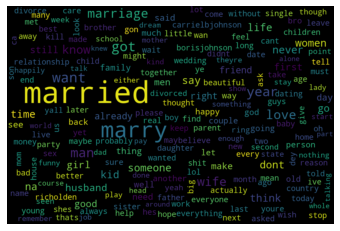

,count
keyword,
married,1511
marry,803
marriage,206
love,196
want,195
wife,181
got married,175
know,168
man,151



divorce


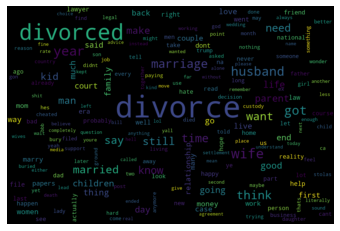

,count
keyword,
divorce,391
divorced,174
wife,48
husband,41
year,40
marriage,37
think,36
time,35
want,33



wife


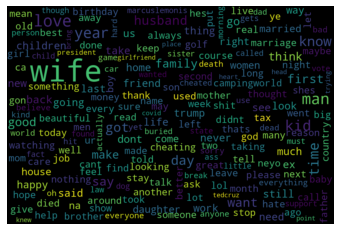

,count
keyword,
wife,3574
love,283
man,237
know,219
day,194
got,184
husband,178
want,172
time,170



husband


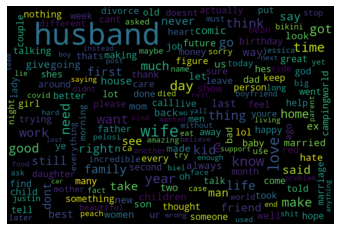

,count
keyword,
husband,2316
wife,177
love,153
day,126
want,125
know,125
need,117
time,110
think,105


In [20]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
#b = 'foundation'
for b in search_words:
    
    print("=========================================\n")
    print(b)

    wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(all_text(b))
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()
    
    kwords = WordCloud().process_text(all_text(b))
    # transform that dictionary into a pandas DataFrame
    df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
    display(df_kwords.sort_values(by='count', ascending=False).head(20))
    
    kwords = WordCloud().process_text(all_text(b))
    # transform that dictionary into a pandas DataFrame
    df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
    df_kwords

In [21]:
# df_wc = pd.DataFrame(list(WordCloud().process_text(brand_all_text(b)).items()),columns = ['word','count'])
# df_wc =df_wc.sort_values(by='count', ascending=False)
# df_wc

In [22]:
import nltk

In [23]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.BigramCollocationFinder.from_documents([d.split() for d in df_tweets['text_clean']])

bigram_finder.apply_freq_filter(3)

bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('time', 'traveler'), 3),
 (('traveler', 'wife'), 3),
 (('wife', 'sign'), 4),
 (('women', 'wife'), 3),
 (('got', 'married'), 175),
 (('married', 'would'), 13),
 (('would', 'perfect'), 4),
 (('us', 'got'), 3),
 (('got', 'mad'), 4),
 (('friend', 'married'), 6),
 (('married', 'girl'), 3),
 (('already', 'got'), 4),
 (('house', 'wife'), 13),
 (('real', 'man'), 5),
 (('along', 'husband'), 6),
 (('want', 'divorce'), 8),
 (('husband', 'loves'), 8),
 (('wife', 'child'), 7),
 (('wife', 'guess'), 3),
 (('stay', 'home'), 17),
 (('home', 'mom'), 4),
 (('9', 'year'), 3),
 (('year', 'old'), 48),
 (('old', 'daughter'), 5),
 (('say', 'marry'), 7),
 (('shes', 'married'), 10),
 (('good', 'morning'), 14),
 (('husband', 'see'), 4),
 (('marry', 'rich'), 4),
 (('ex', 'wife'), 100),
 (('good', 'wife'), 21),
 (('wife', 'works'), 6),
 (('husband', 'material'), 13),
 (('husband', 'lol'), 9),
 (('2', 'years'), 16),
 (('years', 'ago'), 65),
 (('ago', 'would'), 3),
 (('husband', 'always'), 7),
 (('look', 'wife'),

In [24]:
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq = df_freq[~df_freq['keyphrase'].str.contains('marr')]
df_freq = df_freq[~df_freq['keyphrase'].str.contains('divorce')]
df_freq = df_freq[~df_freq['keyphrase'].str.contains('wife')]
df_freq = df_freq[~df_freq['keyphrase'].str.contains('husband')]
df_freq.reset_index(drop=True, inplace=True)
df_freq.head(50)

,keyphrase,count
0,gon na,106
1,golf course,84
2,wan na,72
3,richolden borisjohnson,67
4,borisjohnson carrielbjohnson,67
5,years ago,65
6,marcuslemonis campingworld,58
7,happy birthday,48
8,year old,48
9,last night,42
